In [140]:
from google.colab import drive

ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
# %cd drive/MyDrive/USyd/Lab/Projects/Grassmann-ADMM/
%cd /content/drive/MyDrive/Period 3 2021/Topics/Anomaly Detection/Grassmann-ADMM

/content/drive/.shortcut-targets-by-id/1--KFxvaXdkIjqALlrqq4yuAf6LShAdeu/Grassmann-ADMM


In [310]:
# custom font
!wget https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf

--2022-08-03 03:17:27--  https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf [following]
--2022-08-03 03:17:27--  https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145348 (142K) [application/octet-stream]
Saving to: ‘Roboto-Regular.ttf’

Roboto-Regular.ttf  100%[===================>] 141.94K  --.-KB/s    in 0.02s   

2022-08-03 03:17:27 (6.47 MB/s) - ‘Roboto-Regular.ttf’ saved [145348/145348]



In [334]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])
matplotlib.rc('font', family='TH Sarabun New')

--2022-08-03 03:29:20--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2022-08-03 03:29:20--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2022-08-03 03:29:21 (5.19 MB/s) - ‘t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  


In [328]:
import matplotlib.font_manager as fm
# fm.fontManager.ttflist += fm.createFontList(['Roboto-Regular.ttf'])
fm.fontManager.ttflist += fm.createFontList(['times.ttf'])
matplotlib.rc('font', family='Times New Roman')
# matplotlib.rc('font', family='Roboto')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [333]:
'''
Import necessary libraries
'''
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# %matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['text.usetex'] = False
matplotlib.rc('font', family='Times New Roman')
# matplotlib.rc('font', family='Times New Roman')

In [314]:
myattack = 'U2R' # choose from DOS, Probe, U2R, R2L or None

### Read and process data

In [144]:
# '''
# Get KDDCup1999 from original source and store as a csv file
# '''
# url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
# # url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz'
# # url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.newtestdata_10_percent_unlabeled.gz'
# df = pd.read_csv(url, header=None)

# # Assign names for columns
# df.columns= [ 'duration','protocol_type', 'service', 'flag', 'src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
# 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
# 'is_host_login', 'is_guest_login','cnt','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
# 'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
# 'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome']
# # Choose categorical columns to remove because PCA show good performance with numeric data
# columns_drop = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login']
# # Remove the categorical data
# df.drop(columns_drop, axis=1, inplace=True)
# # Get all normal data
# df_normal = df[df['outcome']=='normal.']
# # Get all abnormal data
# df_abnormal = df[df['outcome']!='normal.']

# # Define training and testing dataframes
# df_train = df_normal[10000:90000].copy()
# df_train = df_train.drop('outcome', axis=1)

# df_test_normal = df_normal[:10000]
# df_test_normal = df_test_normal.drop('outcome', axis=1)
# df_test_normal = df_test_normal.sample(n=8000, random_state=1)

# df_test_abnormal = df_abnormal#[100000:200000]
# df_test_abnormal = df_test_abnormal.drop('outcome', axis=1)
# df_test_abnormal = df_test_abnormal.sample(n=10000, random_state=1)

#  = pd.concat([df_test_normal, df_test_abnormal])
# df_test.columns = df_test_abnormal.columns


In [145]:
# '''
# Read Pre-processed NSL-KDD (training: all normal)
# '''

file_path_train = os.path.join(os.path.abspath(''), "abnormal_detection_data/train/nslkdd_train_normal.csv")
file_path_test = os.path.join(os.path.abspath(''), "abnormal_detection_data/test/nslkdd_test.csv")
df_train = pd.read_csv(file_path_train, index_col = 0)
df_test = pd.read_csv(file_path_test, index_col = 0)


In [146]:
'''
Read Pre-processed NSL-KDD (training: both labels)
'''

# file_path_train = os.path.join(os.path.abspath(''), "abnormal_detection_data/train/nslkdd_train.csv")
# file_path_test = os.path.join(os.path.abspath(''), "abnormal_detection_data/test/nslkdd_test.csv")
# df_train_all = pd.read_csv(file_path_train, index_col = 0)
# df_test = pd.read_csv(file_path_test, index_col = 0)

# df_train.loc[df_train['outcome']=='normal'].shape[0]/len(df_train) # 0.5345828074269883

'\nRead Pre-processed NSL-KDD (training: both labels)\n'

In [147]:
# use part of training data
# df_train = df_train.sample(500, random_state=1)

In [148]:
# Define lst of string of each attch
lst_DoS = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
lst_Probe = ['ipsweep','mscan','nmap','portsweep','saint','satan']
lst_U2R = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
lst_R2L = ['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop']


In [149]:
# Define training and testing dataframes
df_test_normal = df_test.loc[df_test['outcome']=='normal']
df_test_abnormal = df_test.loc[df_test['outcome']!='normal']
df_test_DoS = pd.concat([df_test_normal, df_test.loc[df_test['outcome'].isin(lst_DoS)]], axis=0)
df_test_Probe = pd.concat([df_test_normal, df_test.loc[df_test['outcome'].isin(lst_Probe)]], axis=0)
df_test_U2R = pd.concat([df_test_normal, df_test.loc[df_test['outcome'].isin(lst_U2R)]], axis=0)
df_test_R2L = pd.concat([df_test_normal, df_test.loc[df_test['outcome'].isin(lst_R2L)]], axis=0)


In [150]:
def df_reset_index(lst_df):
  for df in lst_df:
    df.reset_index(drop=True, inplace=True)
df_reset_index([df_train, df_test, df_test_normal, df_test_abnormal, df_test_DoS, df_test_Probe, df_test_U2R, df_test_R2L])

In [151]:
# Define labels dataframes
def get_label(df, type_str=['normal']):
  temp = df.copy()
  # df.loc[df['A'] > 2, 'B'] = new_val
  temp.loc[df.outcome.isin(type_str), 'outcome'] = 0
  temp.loc[~df.outcome.isin(type_str), 'outcome'] = 1
  return temp['outcome'].astype(int)

label_test = get_label(df_test, type_str=['normal'])
label_DoS = get_label(df_test_DoS, type_str=['normal'])
label_Probe = get_label(df_test_Probe, type_str=['normal'])
label_U2R = get_label(df_test_U2R, type_str=['normal'])
label_R2L = get_label(df_test_R2L, type_str=['normal'])

In [152]:
# Test on specific attack only
if myattack == 'DOS':
  df_test = df_test_DoS.copy()
  label_test = label_DoS.copy()
elif myattack == 'Probe':
  df_test = df_test_Probe.copy()
  label_test = label_Probe.copy()
elif myattack == 'U2R':
  df_test = df_test_U2R.copy()
  label_test = label_U2R.copy()
elif myattack == 'R2L':
  df_test = df_test_R2L.copy()
  label_test = label_R2L.copy()

In [153]:
def df_drop_outcome(lst_df):
  for df in lst_df:
    df.drop('outcome', axis=1, inplace=True)
df_drop_outcome([df_train, df_test, df_test_normal, df_test_abnormal, df_test_DoS, df_test_Probe, df_test_U2R, df_test_R2L])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [154]:
print(df_train.shape)
print(df_test.shape)
print(df_test_normal.shape)
print(df_test_abnormal.shape)
print(df_test_DoS.shape)
print(df_test_Probe.shape)
print(df_test_U2R.shape)
print(df_test_R2L.shape)

(67343, 34)
(9778, 34)
(9711, 34)
(12833, 34)
(17171, 34)
(12132, 34)
(9778, 34)
(12596, 34)


In [155]:
# Standardization over Training and Testing
scaler = StandardScaler()
scaler.fit(df_train)
# df_train = pd.DataFrame(scaler.transform(df_train), columns = df_train.columns)
df_test_raw = df_test.copy()
df_test = pd.DataFrame(scaler.transform(df_test), columns = df_test.columns)


In [156]:
# Define the score function for abnormal detection
def anomalyScores(originalDF, reducedDF):

  loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
  loss = pd.Series(data=loss,index=originalDF.index)
  loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
  return loss

### **Run AutoEncoder over Test Set**

In [157]:
# read reconstructionError of AutoEncoder from csv
file_path_baseline = os.path.join(os.path.abspath(''), "abnormal_detection_data/test/AE_LSTM.csv")

df_baseline = pd.read_csv(file_path_baseline, index_col = 0)

In [158]:
df_gt_reerror_AutoEn = pd.DataFrame()

df_baseline_normal = df_baseline.loc[df_baseline['outcome'].isin(['normal'])]
if myattack == 'DOS':
  df_baseline_DOS = df_baseline.loc[df_baseline['outcome'].isin(lst_DoS)]
  df_baseline = pd.concat([df_baseline_normal, df_baseline_DOS], axis=0)
elif myattack == 'Probe':
  df_baseline_Probe = df_baseline.loc[df_baseline['outcome'].isin(lst_Probe)]
  df_baseline = pd.concat([df_baseline_normal, df_baseline_Probe], axis=0)
elif myattack == 'U2R':
  df_baseline_U2R = df_baseline.loc[df_baseline['outcome'].isin(lst_U2R)]
  df_baseline = pd.concat([df_baseline_normal, df_baseline_U2R], axis=0)
elif myattack == 'R2L':
  df_baseline_R2L = df_baseline.loc[df_baseline['outcome'].isin(lst_R2L)]
  df_baseline = pd.concat([df_baseline_normal, df_baseline_R2L], axis=0)
df_gt_reerror_AutoEn['anomalyScore'] = df_baseline['re_arr'].values

label_test_LSTM = pd.DataFrame(np.concatenate([np.zeros(df_test_normal.shape[0]), np.ones(df_baseline.shape[0]-df_test_normal.shape[0])]), columns = ['outcome']).astype(int)
df_gt_reerror_AutoEn['ground_true'] = label_test_LSTM

### **Run LSTM over Test Set**

In [159]:
# read reconstructionError of AutoEncoder from csv
file_path_baseline = os.path.join(os.path.abspath(''), "abnormal_detection_data/test/AE_LSTM.csv")

df_baseline = pd.read_csv(file_path_baseline, index_col = 0)

In [160]:
df_gt_reerror_LSTM = pd.DataFrame()

df_baseline_normal = df_baseline.loc[df_baseline['outcome'].isin(['normal'])]
if myattack == 'DOS':
  df_baseline_DOS = df_baseline.loc[df_baseline['outcome'].isin(lst_DoS)]
  df_baseline = pd.concat([df_baseline_normal, df_baseline_DOS], axis=0)
elif myattack == 'Probe':
  df_baseline_Probe = df_baseline.loc[df_baseline['outcome'].isin(lst_Probe)]
  df_baseline = pd.concat([df_baseline_normal, df_baseline_Probe], axis=0)
elif myattack == 'U2R':
  df_baseline_U2R = df_baseline.loc[df_baseline['outcome'].isin(lst_U2R)]
  df_baseline = pd.concat([df_baseline_normal, df_baseline_U2R], axis=0)
elif myattack == 'R2L':
  df_baseline_R2L = df_baseline.loc[df_baseline['outcome'].isin(lst_R2L)]
  df_baseline = pd.concat([df_baseline_normal, df_baseline_R2L], axis=0)
df_gt_reerror_LSTM['anomalyScore'] = df_baseline['prob'].values

label_test_LSTM = pd.DataFrame(np.concatenate([np.zeros(df_test_normal.shape[0]), np.ones(df_baseline.shape[0]-df_test_normal.shape[0])]), columns = ['outcome']).astype(int)
df_gt_reerror_LSTM['ground_true'] = label_test_LSTM

### **Run Centralized PCA over Test Set**

In [161]:
from sklearn.decomposition import PCA
def perform_pca(df_train, df_test, scaler):
  pca = PCA(20) #20 for all normal train, 23 for mixed train
  pca.fit(scaler.transform(df_train))

  # we don't use built-in fit_transform() since we fit on train and transform over test. In fact, we can fit(df_train) and transform(df_test) as well.
  # source code: https://github.com/scikit-learn/scikit-learn/blob/baf0ea25d/sklearn/decomposition/_pca.py#L411
  # df_test_PCA_manual = (df_test-scaler.mean_).dot(pca.components_.T)
  # df_test_PCA_inverse_manual = df_test_PCA_manual.dot(pca.components_) + scaler.mean_
  df_test_PCA = pca.transform(df_test)
  df_test_PCA_inverse = pca.inverse_transform(df_test_PCA)
  # debug: passed
  # print(np.allclose(df_test_PCA, df_test_PCA_manual))
  # print(np.allclose(df_test_PCA_inverse, df_test_PCA_inverse_manual))
  df_test_PCA = pd.DataFrame(df_test_PCA)
  df_test_PCA_inverse = pd.DataFrame(df_test_PCA_inverse)

  print(pca.explained_variance_ratio_.sum())
  print(pca.components_.shape)
  
  return df_test_PCA, df_test_PCA_inverse

In [101]:
df_test_PCA, df_test_PCA_inverse = perform_pca(df_train, df_test, scaler)

abnormal_score = anomalyScores(df_test, df_test_PCA_inverse)

df_gt_score_PCA = pd.DataFrame(); df_gt_pred_PCA = pd.DataFrame()
df_gt_score_PCA['ground_true'] = label_test
df_gt_score_PCA['anomalyScore'] = abnormal_score

0.9207269706187933
(20, 34)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### **Run FedPCA over Test Set**

In [162]:
import numpy as np
V_k = np.load('Grassman_Abnormaldetection_KDD_dim_30_std_client_20_iter_100_lr_0.001_sub_0.1_localEpochs_30.npy')

# V_k = np.load('Grassman_Abnormaldetection_KDD_dim_30_std_client_20_iter_1000_lr_0.0001_sub_0.1_localEpochs_30.npy')
# V_k = np.load('Grassman_Abnormaldetection_KDD_dim_20_std_client_20_iter_10_lr_0.001_sub_0.1_localEpochs_30.npy')
V_k.shape

(34, 30)

(34, 30)

In [163]:
# # number of clients vs performance
# lst_E_V_k = []; lst_G_V_k = []; lst_N = [10,20,50,100,500,1000]
# for algo in ['Euclidean','Grassman']:
#   for i in lst_N:
#     file_name = os.path.join(os.path.abspath(''),algo+'_Abnormaldetection_KDD_dim_30_std_client_'+str(i)+'_iter_100_lr_0.0001_sub_0.1_localEpochs_30.npy')
#     temp = np.load(file_name)
#     if algo == 'Euclidean':
#       lst_E_V_k.append(temp)
#     if algo == 'Grassman':
#       lst_G_V_k.append(temp)

In [164]:
# PCA transform with zero mean
def self_pca_transform_with_zero_mean(X_train, V_k):
  return (X_train).dot(V_k)
  
# PCA inverse transform with zero mean
def self_inverse_transform_with_zero_mean(X_pca, V_k):
  return (X_pca.dot(V_k.T))

In [165]:
# FedPCA: Obtain dataframe of groundTrue and anomalyScore using V_k

df_test_transform = self_pca_transform_with_zero_mean(df_test, V_k)
df_test_inverse = self_inverse_transform_with_zero_mean(df_test_transform, V_k)

abnormal_score = anomalyScores(df_test, df_test_inverse)

df_gt_score = pd.DataFrame(); df_gt_pred = pd.DataFrame()
df_gt_score['ground_true'] = label_test
df_gt_score['anomalyScore'] = abnormal_score

In [166]:
# lst_E_df_gt_score = []; lst_G_df_gt_score = []

# for temp_V_k in lst_E_V_k:
#     temp_df_test_transform = self_pca_transform_with_zero_mean(df_test, temp_V_k)
#     temp_df_test_inverse = self_inverse_transform_with_zero_mean(temp_df_test_transform, temp_V_k)

#     temp_abnormal_score = anomalyScores(df_test, temp_df_test_inverse)

#     temp_df_gt_score = pd.DataFrame(); temp_df_gt_pred = pd.DataFrame()
#     temp_df_gt_score['ground_true'] = label_test
#     temp_df_gt_score['anomalyScore'] = temp_abnormal_score
#     lst_E_df_gt_score.append(temp_df_gt_score)
# for temp_V_k in lst_G_V_k:
#     temp_df_test_transform = self_pca_transform_with_zero_mean(df_test, temp_V_k)
#     temp_df_test_inverse = self_inverse_transform_with_zero_mean(temp_df_test_transform, temp_V_k)

#     temp_abnormal_score = anomalyScores(df_test, temp_df_test_inverse)

#     temp_df_gt_score = pd.DataFrame(); temp_df_gt_pred = pd.DataFrame()
#     temp_df_gt_score['ground_true'] = label_test
#     temp_df_gt_score['anomalyScore'] = temp_abnormal_score
#     lst_G_df_gt_score.append(temp_df_gt_score)

In [167]:
# # for debug of lst above:
# print(lst_N)
# temp_df_gt_score = lst_G_df_gt_score[1]
# temp_df_gt_score # passed, 注意对比df_gt_score的时候lr改成0.0001

### **Run Self-Learing PCA over Test Set**

In [168]:
n = 20
step_train = int(df_train.shape[0]/n)
step_test = int(df_test.shape[0]/n)

In [169]:
df_train1 = df_train.copy().sort_values(by=['dst_bytes'])
df_train1 = df_train1.reset_index(drop=True)

In [170]:
lst_abnormal_score = []
for i in range(n):
    df_train_stdPCA = df_train.iloc[i*step_train:(i+1)*step_train,:].copy()
    # df_test_stdPCA = df_test.iloc[i*step_test:(i+1)*step_test,:].copy()
    # label_test_stdPCA = label_test.iloc[i*step_test:(i+1)*step_test].copy()
    df_test_stdPCA = df_test_raw.copy()
    label_test_stdPCA = label_test.copy()
    # Standardization over Testing
    sc = StandardScaler()
    sc.fit(df_train_stdPCA)
    df_test_stdPCA = pd.DataFrame(sc.transform(df_test_stdPCA))
    # df_test_stdPCA.columns = df_test.columns
    # Centralized PCA: Obtain dataframe of groundTrue and anomalyScore using PCA.fit(df_train)
    _, df_test_stdPCA_inverse = perform_pca(df_train_stdPCA, df_test_stdPCA, sc)

    temp = anomalyScores(df_test_stdPCA, df_test_stdPCA_inverse)

    lst_abnormal_score.append(temp)

lst_df_gt_score_stdPCA = []
for i in range(n):
  df_gt_score_stdPCA = pd.DataFrame(); df_gt_pred_stdPCA = pd.DataFrame()
  df_gt_score_stdPCA['ground_true'] = label_test
  df_gt_score_stdPCA['anomalyScore'] = lst_abnormal_score[i]
  lst_df_gt_score_stdPCA.append(df_gt_score_stdPCA)

0.9394504452966453
(20, 34)
0.9422682450287476
(20, 34)
0.959528345580093
(20, 34)
0.9580964250187939
(20, 34)
0.9612299107966646
(20, 34)
0.9197692334126889
(20, 34)
0.9429853020399894
(20, 34)
0.9596880116015142
(20, 34)
0.9399551025954845
(20, 34)
0.9437997023239748
(20, 34)
0.9531995090571194
(20, 34)
0.9439346238729882
(20, 34)
0.9545459422953919
(20, 34)
0.9486450535278975
(20, 34)
0.9441093306956999
(20, 34)
0.9290454847444188
(20, 34)
0.9330997329741916
(20, 34)
0.9529899490932532
(20, 34)
0.9372477870016033
(20, 34)
0.9481959210236419
(20, 34)
0.9394504452966458
(20, 34)
0.9422682450287484
(20, 34)
0.9595283455800931
(20, 34)
0.9580964250187931
(20, 34)
0.9612299107966644
(20, 34)
0.9197692334126824
(20, 34)
0.9429853020399896
(20, 34)
0.9596880116015143
(20, 34)
0.939955102595485
(20, 34)
0.943799702323975
(20, 34)
0.9531995090571181
(20, 34)
0.9439346238729882
(20, 34)
0.9545459422953911
(20, 34)
0.9486450535278955
(20, 34)
0.9441093306957017
(20, 34)
0.9290454847444192
(20,

### **Preformance: pre-defined functions**

In [288]:
def results_p(df_gt_score, p1=0.4,p2=0.8,step=0.001):
  lst_p = np.arange(p1,p2,step) # Among test, ratio of normal/abnormal = 0.75
  # print(lst_p)
  lst_rho = np.quantile(df_gt_score.anomalyScore, lst_p)
  df = pd.DataFrame(np.zeros((len(lst_rho),6)))
  df.columns = ['rho','precision_score', 'recall_score', 'accuracy_score', 'f1_score', 'fpr']
  for i, rho in enumerate(lst_rho):
    precision_score, recall_score, accuracy_score, f1_score, fpr = results_analysis(df_gt_score, threshold=rho, log=0)
    df.iloc[i,0] = lst_p[i]
    df.iloc[i,1:] = precision_score, recall_score, accuracy_score, f1_score, fpr
  return df, lst_rho, lst_p

In [289]:
def plot_results(df, algoName, saveOrsave = 0):
  matplotlib.rcParams['pdf.fonttype'] = 42
  plt.figure(figsize=(5,5));
  plt.plot(df['rho'], df['accuracy_score'],'b*-', label=('Acc'), markersize=6)#, linewidth=1)
  plt.plot(df['rho'], df['precision_score'], 'g.-', label=('Pre'), markersize=6)
  plt.plot(df['rho'], df['recall_score'], 'ro-', label=('TPR'), markersize=5)
  plt.plot(df['rho'], df['fpr'],'k^-', label=('FPR'), markersize=5)
  plt.plot(df['rho'], df['f1_score'],'ms-', label=('F1'), markersize=5)
  plt.xlabel(r'$p$')
  plt.ylabel('Performance')
  xticks = np.arange(0,1.2,0.2)
  plt.xticks(xticks)
  plt.legend(loc = 'lower left')
  # plt.grid()
  if saveOrsave:
    # plt.savefig(os.path.join(os.path.abspath(''),'plots/results-p.eps'),format='eps',bbox_inches='tight')
    plt.savefig(os.path.join(os.path.abspath(''),'plots/results-p.pdf'), bbox_inches="tight",pad_inches = 0)
    
  else:
    plt.title(f"Performance of {algoName} with different percentage threshold p")
    plt.show()

In [290]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_prc(df, algoName, saveOrsave=0):
  precision, recall, thresholds = precision_recall_curve(df_gt_score['ground_true'],df_gt_score['anomalyScore'])
  average_precision = average_precision_score(df_gt_score['ground_true'],df_gt_score['anomalyScore'])

  plt.figure(figsize=(5,5));
  plt.step(recall, precision, color='k', alpha=1)
  plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])

  if saveOrsave:
    plt.savefig(os.path.join(os.path.abspath(''),'plots/prc.eps'),format='eps',bbox_inches='tight')
  else:
    plt.title(f'{algoName}: Precision-Recall curve: Average Precision = {np.round(average_precision*100,2)}')
    plt.show()


In [291]:
from sklearn.metrics import roc_curve, auc

def plot_roc(df, algoName, saveOrsave=0):
  fpr, tpr, thresholds = roc_curve(df_gt_score['ground_true'], df_gt_score['anomalyScore'])
  areaUnderROC = auc(fpr, tpr)

  plt.figure(figsize=(5,5));
  plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
  plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="lower right")

  if saveOrsave:
    plt.savefig(os.path.join(os.path.abspath(''),'plots/roc.eps'),format='eps',bbox_inches='tight')
  else:
    plt.title(f'{algoName}: ROC: Area under the curve = {np.round(areaUnderROC*100,2)}')
    plt.show()

In [292]:
from sklearn.metrics import classification_report, confusion_matrix

def results_analysis(df_gt_score, threshold, log=0):
  df_gt_pred = pd.DataFrame()
  df_gt_pred['ground_true'] = df_gt_score['ground_true']
  index = df_gt_score['anomalyScore'] > threshold
  df_gt_pred['prediction'] = index.astype(int)

  TN, FP, FN, TP = confusion_matrix(df_gt_pred['ground_true'], df_gt_pred['prediction']).ravel()
  precision_score = TP/(FP + TP)
  recall_score = TP/(FN + TP)
  accuracy_score = (TP + TN)/ (TP + FN + TN + FP)
  f1_score = 2*precision_score*recall_score/(precision_score + recall_score)
  fpr = FP / (FP+TN) # False positive rate (FPR); False Alarm = FP/N

  if log:
    # print(classification_report(df_gt_pred['ground_true'], df_gt_pred['prediction']))
    print(f"Precision: {np.round(precision_score * 100.0,4)}%")
    print(f"Recall: {np.round(recall_score * 100.0,4)}%")
    print(f"Accuracy score: {np.round(accuracy_score * 100.0,4)}%")
    print(f"F1 score: {np.round(f1_score * 100.0,4)}%")
    print(f"False alarm: {np.round(fpr * 100.0,4)}%")

  return precision_score, recall_score, accuracy_score, f1_score, fpr

In [293]:
def scatterPlot(df_test, df_test_inverse, algoName, transformed=1, n_samples=100, dim1=0, dim2=1):
  if n_samples == 0:
    data = df_test.copy()
    data_inverse = df_test_inverse.copy()
  else:
    data = df_test.sample(n_samples, random_state=1).copy()
    data_inverse = df_test_inverse.copy().iloc[data.index,:]

  df_test_inverse.columns = df_test.columns
  data['label'] = df_gt_score['ground_true']
  data_inverse['label'] = df_gt_score['ground_true']


  data_plot = data.iloc[:,[dim1,dim2,-1]]
  data_inverse_plot = data_inverse.iloc[:,[dim1,dim2,-1]]
  data_plot.columns = [data.columns[dim1], data.columns[dim2], 'label']
  data_inverse_plot.columns = [data.columns[dim1], data.columns[dim2], 'label']

  sns.set(rc={"figure.figsize":(5,5)})
  if transformed:
    sns.lmplot(x=data.columns[dim1], y=data.columns[dim2], hue="label", \
                data=data_inverse_plot, fit_reg=False)
    ax = plt.gca()
    ax.set_title(f"Separation of Observations using {algoName}")
  else:
    sns.lmplot(x=data.columns[dim1], y=data.columns[dim2], hue="label", \
                data=data_plot, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Original Observations")
  plt.show()

  # if saveOrsave:
  #   plt.savefig(os.path.join(os.path.abspath(''),'plots/scatterPlot.eps'),format='eps',bbox_inches='tight')
  # else:
  #   plt.title(f"Separation of Observations")
  #   plt.show()


### **Performance of FedPCA**

#### (1) Performance of FedPCA with different percentage value p.

In [177]:
lst_p = np.arange(0,1,0.1) # Among test, ratio of normal/abnormal = 0.75
# print(lst_p)
lst_rho = np.quantile(df_gt_score.anomalyScore, lst_p)
df = pd.DataFrame(np.zeros((len(lst_rho),6)))
df.columns = ['rho','precision_score', 'recall_score', 'accuracy_score', 'f1_score', 'fpr']
for i, rho in enumerate(lst_rho):
  precision_score, recall_score, accuracy_score, f1_score, fpr = results_analysis(df_gt_score, threshold=rho, log=0)
  df.iloc[i,0] = lst_p[i]
  df.iloc[i,1:] = precision_score, recall_score, accuracy_score, f1_score, fpr

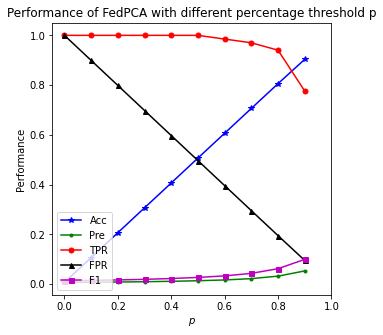

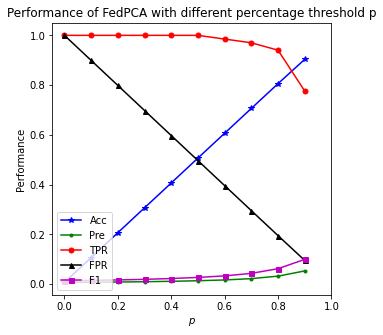

In [178]:
if myattack == 'None':
  plot_results(df, 'FedPCA', saveOrsave = 0)
else:
  plot_results(df, 'FedPCA', saveOrsave = 0)

In [179]:
optimal_p = 0.50
optimal_rho = lst_rho[abs(lst_p - optimal_p)<1e-4][0]
optimal_rho

1.6524482502887105e-05

1.6524482502887105e-05

In [180]:
precision_score, recall_score, accuracy_score, f1_score, fpr = results_analysis(df_gt_score, threshold=optimal_rho, log=1)

Precision: 1.3704%
Recall: 100.0%
Accuracy score: 50.6852%
F1 score: 2.7038%
False alarm: 49.655%
Precision: 1.3704%
Recall: 100.0%
Accuracy score: 50.6852%
F1 score: 2.7038%
False alarm: 49.655%


#### (2) Precision-Recall curve and ROC of FedPCA

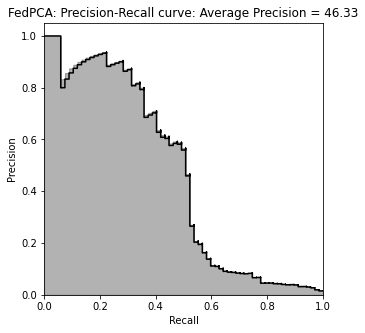

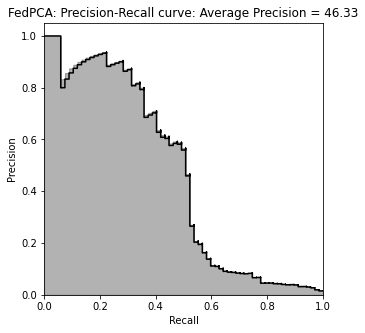

In [181]:
plot_prc(df_gt_score, 'FedPCA', saveOrsave=0)

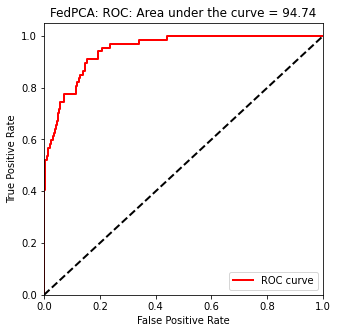

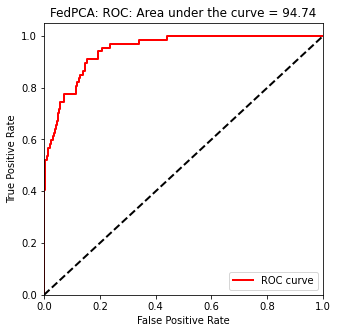

In [182]:
plot_roc(df_gt_score, 'FedPCA', saveOrsave=0)

#### (3) ScatterPlot

In [335]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

def scatterPlot_3D(df_test, df_test_inverse, df_gt_score, algoName='FedPCA', transformed=1, saveOrsave=1, n_samples=0, dim1=2, dim2=18, dim3=21):
  plt.rcParams['axes.facecolor'] = 'white'
  if n_samples == 0:
    data = df_test.copy()
    data_inverse = df_test_inverse.copy()
  else:
    data = df_test.sample(n_samples, random_state=1).copy()
    data_inverse = df_test_inverse.copy().iloc[data.index,:]

  # temp = df_gt_score.copy()
  # temp.loc[temp.ground_true==0,'ground_true'] = 'normal'
  # temp.loc[temp.ground_true==1,'ground_true'] = 'anomaly'

  df_test_inverse.columns = df_test.columns
  data['label'] = df_gt_score['ground_true'].copy()
  data_inverse['label'] = df_gt_score['ground_true'].copy()

  data_plot = data.iloc[:,[dim1,dim2,dim3,-1]]
  data_inverse_plot = data_inverse.iloc[:,[dim1,dim2,dim3,-1]]
  data_plot.columns = [data.columns[dim1], data.columns[dim2], data.columns[dim3], 'label']
  data_inverse_plot.columns = [data.columns[dim1], data.columns[dim2], data.columns[dim3], 'label']

  # define x y z
  if transformed:
    x = -data_inverse_plot.iloc[:,0]
    y = -data_inverse_plot.iloc[:,1]
    z = data_inverse_plot.iloc[:,2]
    label = data_inverse_plot.iloc[:,-1]
  else:
    x = data_plot.iloc[:,0]
    y = data_plot.iloc[:,1]
    z = data_plot.iloc[:,2]
    label = data_plot.iloc[:,-1]

  # axes instance
  fig = plt.figure(figsize=(5,5))
  ax = Axes3D(fig)
  fig.add_axes(ax)

  # get colormap from seaborn
  cmap = ListedColormap(sns.color_palette(['steelblue','indianred']).as_hex())

  # color for each node
  color = df_gt_score.ground_true.copy()

  # plot
  sc = ax.scatter(x, y, z, s=40, c=color, marker='o', cmap=cmap, alpha=1)
  ax.set_xlabel(str(data.columns[dim1]))
  ax.set_ylabel(str(data.columns[dim2]))
  ax.set_zlabel(str(data.columns[dim3]))

  # legend: https://stackoverflow.com/questions/26558816/matplotlib-scatter-plot-with-legend
  classes = ['normal','anomaly'] 
  plt.legend(handles=sc.legend_elements()[0], labels=classes) #, bbox_to_anchor=(1.05, 1), loc=2)
  # plt.grid()

  if saveOrsave:
    if transformed:
      # plt.savefig(os.path.join(os.path.abspath(''),'plots/scatterPlot'+algoName+'_transformed.eps'),format='eps',bbox_inches='tight')
      plt.savefig(os.path.join(os.path.abspath(''),'plots/scatterPlot'+algoName+'_transformed.pdf'), bbox_inches="tight")
    else:
      # plt.savefig(os.path.join(os.path.abspath(''),'plots/scatterPlot_original.eps'),format='eps',bbox_inches='tight')
      plt.savefig(os.path.join(os.path.abspath(''),'plots/scatterPlot_original.pdf'), bbox_inches="tight")
      
  else:
    plt.title(f"Separation of Observations")
    plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


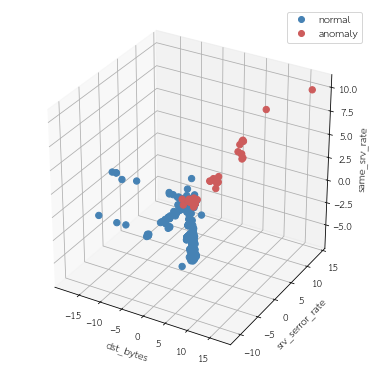

In [336]:
scatterPlot_3D(df_test, df_test_inverse, df_gt_score, algoName='FedPCA', transformed=1, saveOrsave=1, n_samples=0, dim1=2, dim2=18, dim3=21)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


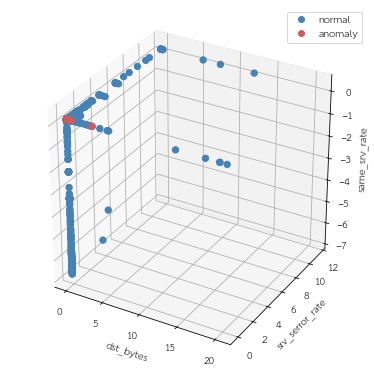

In [337]:
scatterPlot_3D(df_test, df_test_inverse, df_gt_score, algoName='FedPCA', transformed=0, saveOrsave=1, n_samples=0, dim1=2, dim2=18, dim3=21)

In [186]:
# scatterPlot(df_test, df_test_inverse, algoName='FedPCA', transformed=1, n_samples=0, dim1=18, dim2=2)
# scatterPlot(df_test, df_test_inverse, algoName='FedPCA', transformed=0, n_samples=0, dim1=18, dim2=2)

In [187]:
# lst_i = [2,14,15,18,21]
# lst_j = [2,14,15,18,21]
# for i in lst_i:
#   for j in lst_j:
#     if i!=j:
#       print(i,j)  
#       scatterPlot(df_test, df_test_inverse, algoName='FedPCA', transformed=1, n_samples=0, dim1=i, dim2=j)
#       scatterPlot(df_test, df_test_inverse, algoName='FedPCA', transformed=0, n_samples=0, dim1=i, dim2=j)

###**Performance of Centralized PCA**

#### (1) Performance of Centralized PCA with different percentage value p.

In [188]:
df_results_p_PCA, lst_rho_PCA, lst_p_PCA = results_p(df_gt_score_PCA, p1=0.4,p2=0.8,step=0.001)

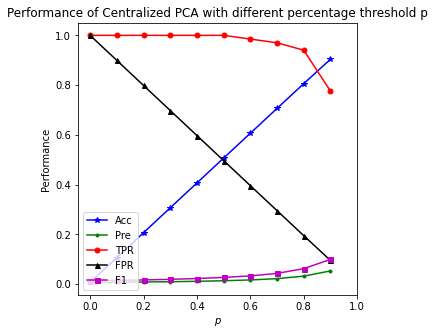

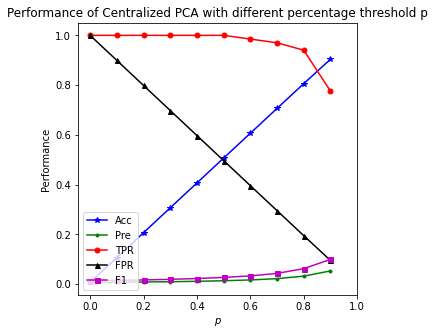

In [189]:
plot_results(df, 'Centralized PCA', saveOrsave = 0)

In [190]:
optimal_p = 0.55
optimal_rho = lst_rho_PCA[abs(lst_p_PCA - optimal_p)<1e-4][0]
optimal_rho

0.0002913210134324096

0.0002913210134324096

In [191]:
precision_score, recall_score, accuracy_score, f1_score, fpr = results_analysis(df_gt_score_PCA, threshold=optimal_rho, log=1)

Precision: 1.4545%
Recall: 95.5224%
Accuracy score: 55.6249%
F1 score: 2.8655%
False alarm: 44.6504%
Precision: 1.4545%
Recall: 95.5224%
Accuracy score: 55.6249%
F1 score: 2.8655%
False alarm: 44.6504%


#### (2) Precision-Recall curve and ROC of Centralized PCA

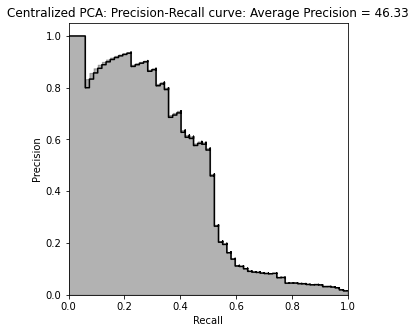

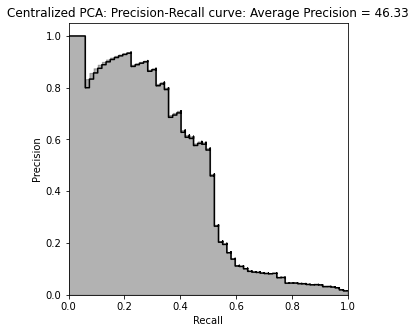

In [192]:
plot_prc(df_gt_score_PCA, 'Centralized PCA', saveOrsave=0)

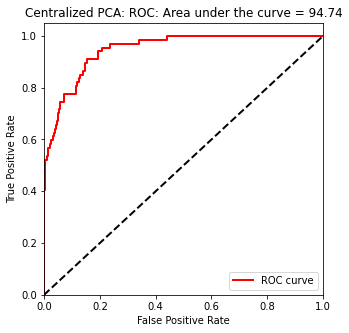

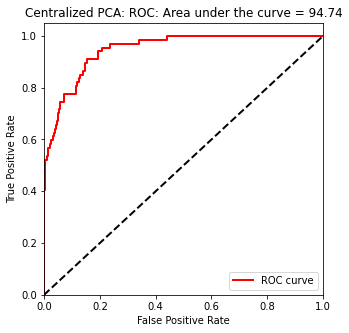

In [193]:
plot_roc(df_gt_score_PCA, 'Centralized PCA', saveOrsave=0)

#### (3) ScatterPlot of Centralized PCA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


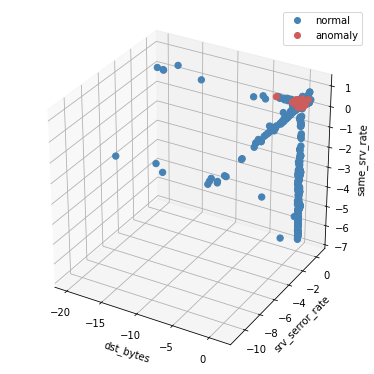

In [285]:
scatterPlot_3D(df_test, df_test_PCA_inverse, df_gt_score_PCA, algoName='Centralized PCA', transformed=1, saveOrsave=1, n_samples=0, dim1=2, dim2=18, dim3=21)

In [227]:
# scatterPlot_3D(df_test, df_test_PCA_inverse, df_gt_score, algoName='Centralized PCA', transformed=0, saveOrsave=0, n_samples=0, dim1=2, dim2=18, dim3=21)

In [196]:
# scatterPlot(df_test, df_test_PCA_inverse, algoName='CentralizedPCA', transformed=1, n_samples=0, dim1=18, dim2=21)
# scatterPlot(df_test, df_test_PCA_inverse, algoName='CentralizedPCA', transformed=0, n_samples=0, dim1=18, dim2=21)

###**Performance of Self-learning PCA**

In [197]:
lst_std_results = []
for i, df_gt_score_stdPCA in enumerate(lst_df_gt_score_stdPCA):
  # print(i)
  lst_p = np.arange(0.4,0.8,0.001) # Among test, ratio of normal/abnormal = 0.75
  # print(lst_p)
  lst_rho = np.quantile(df_gt_score_stdPCA.anomalyScore, lst_p)

  # df = pd.DataFrame(np.zeros((len(lst_rho),6)))
  # df.columns = ['rho','precision_score', 'recall_score', 'accuracy_score', 'f1_score', 'fpr']
  # for i, rho in enumerate(lst_rho):
  #   precision_score, recall_score, accuracy_score, f1_score, fpr = results_analysis(df_gt_score_stdPCA, threshold=rho, log=0)
  #   df.iloc[i,0] = lst_p[i]
  #   df.iloc[i,1:] = precision_score, recall_score, accuracy_score, f1_score, fpr
  # plot_results(df, "Self-Learning PCA")

  optimal_p = 0.5
  optimal_rho = lst_rho[abs(lst_p - optimal_p)<1e-4][0]
  precision_score, recall_score, accuracy_score, f1_score, fpr = results_analysis(df_gt_score_stdPCA, threshold=optimal_rho, log=0)
  lst_std_results.append([precision_score, recall_score, accuracy_score, f1_score, fpr])

df_stdPCA_results = pd.DataFrame(lst_std_results, columns=['precision_score', 'recall_score', 'accuracy_score', 'f1_score', 'fpr'])

In [198]:
df_stdPCA_results.mean()*100

precision_score     1.342810
recall_score       97.985075
accuracy_score     50.657599
f1_score            2.649314
fpr                49.668932
dtype: float64

precision_score     1.342810
recall_score       97.985075
accuracy_score     50.657599
f1_score            2.649314
fpr                49.668932
dtype: float64

### **Performance of AutoEncoder**

In [199]:
df_results_p_AutoEn = results_p(df_gt_reerror_AutoEn, p1=0.4,p2=0.8,step=0.001)

In [200]:
df_results_p_AutoEn, lst_rho_AutoEn, lst_p_AutoEn = results_p(df_gt_reerror_AutoEn, p1=0.4,p2=0.8,step=0.001)

In [201]:
optimal_p = 0.5
optimal_rho = lst_rho_AutoEn[abs(lst_p_AutoEn - optimal_p)<1e-4][0]
optimal_rho

0.00020918425500000002

In [202]:
precision_score, recall_score, accuracy_score, f1_score, fpr = results_analysis(df_gt_reerror_AutoEn, threshold=optimal_rho, log=1)

Precision: 1.2886%
Recall: 94.0299%
Accuracy score: 50.6034%
F1 score: 2.5424%
False alarm: 49.6962%


In [203]:
# normal samples: same distribution
# attack samples: different distribution

# each client takes care of differnt type of attack (gateway) --> some train on normal only / size varies --> FedPCA gonna be better

# Jiayu: survey on prior knowledge

### **Performance of LSTM**

In [204]:
# df_results_p_LSTM = results_p(df_gt_reerror_LSTM, p1=0.4,p2=0.8,step=0.001)

In [205]:
# df_results_p_LSTM, lst_rho_LSTM, lst_p_LSTM = results_p(df_gt_reerror_LSTM, p1=0.4,p2=0.8,step=0.001)

In [206]:
# optimal_p = 0.5
# optimal_rho = lst_rho_LSTM[abs(lst_p_LSTM - optimal_p)<1e-4][0]
# optimal_rho

In [207]:
# precision_score, recall_score, accuracy_score, f1_score, fpr = results_analysis(df_gt_reerror_LSTM, threshold=optimal_rho, log=1)

In [208]:
# plot_results(df_results_p_LSTM, 'LSTM')

### **ROC for all methods**

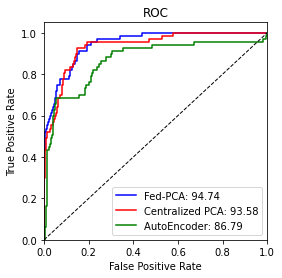

In [209]:
from sklearn.metrics import roc_curve, auc

saveOrsave = 0

fpr, tpr, thresholds = roc_curve(df_gt_score['ground_true'], df_gt_score['anomalyScore']); areaUnderROC = auc(fpr, tpr)
fpr_pca, tpr_pca, thresholds_pca = roc_curve(df_gt_score_PCA['ground_true'], df_gt_score_PCA['anomalyScore']); areaUnderROC_PCA = auc(fpr_pca, tpr_pca)
fpr_AutoEn, tpr_AutoEn, thresholds_AutoEn = roc_curve(df_gt_reerror_AutoEn['ground_true'], df_gt_reerror_AutoEn['anomalyScore']); areaUnderROC_AutoEn = auc(fpr_AutoEn, tpr_AutoEn)
fpr_LSTM, tpr_LSTM, thresholds_LSTM = roc_curve(df_gt_reerror_LSTM['ground_true'], df_gt_reerror_LSTM['anomalyScore']); areaUnderROC_LSTM = auc(fpr_LSTM, tpr_LSTM)

# df_gt_reerror_AutoEn
# df_gt_reerror_LSTMe
plt.figure(figsize=(4,4));
plt.plot(fpr, tpr, color='b', label=f"Fed-PCA: {np.round(areaUnderROC*100,2)}")
plt.plot(fpr_pca, tpr_pca, color='r', label=f"Centralized PCA: {np.round(areaUnderROC_PCA*100,2)}")
plt.plot(fpr_AutoEn, tpr_AutoEn, color='g', label=f"AutoEncoder: {np.round(areaUnderROC_AutoEn*100,2)}")
# plt.plot(fpr_LSTM, tpr_LSTM, color='m', label=f"LSTM: {np.round(areaUnderROC_LSTM*100,2)}")

plt.plot([0, 1], [0, 1], color='k', linestyle='--',lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

if saveOrsave:
  plt.savefig(os.path.join(os.path.abspath(''),'plots/roc_'+myattack+'_all.eps'),format='eps',bbox_inches='tight')
else:
  plt.title(f'ROC')
  plt.show()

##**Real PCA (for debug)**#

In [210]:
# from sklearn.preprocessing import StandardScaler
# X_train = df_normal.iloc[:100,:-1]
# # scaler = StandardScaler()
# # X_train = scaler.fit_transform(X_train)
# m = X_train.mean(axis=0)
# std = X_train.std(axis=0)

In [211]:
# n_components = 9
# whiten = False
# random_state = 2022

# from sklearn.decomposition import PCA
# pca = PCA(n_components=n_components, whiten=whiten, \
#           random_state=random_state)

# # fit transform
# X_train_PCA = pca.fit_transform(X_train)
# X_train_PCA.shape

In [212]:
# # fit transofrm manually 
# X_train_PCA_manual = (X_train - m).dot(pca.components_.T)
# print(X_train_PCA_manual.shape)

# np.allclose(pd.DataFrame(X_train_PCA), pd.DataFrame((X_train_PCA_manual)))

In [213]:
# # inverse transform
# X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
# X_train_PCA_inverse.shape

In [214]:
# # inverse transform manually
# X_train_PCA_inverse_munual = X_train_PCA.dot(pca.components_) + np.array(m)
# print(X_train_PCA_inverse_munual.shape)

# np.allclose(pd.DataFrame(X_train_PCA_inverse), pd.DataFrame((X_train_PCA_inverse_munual)))

In [215]:
# # Choosing optimal k
# for var_ratio in np.arange(0.5,1,0.05):
#   print(var_ratio)
#   pca, df_test_PCA, df_test_PCA_inverse = perform_pca(var_ratio, df_train, df_test, scaler)

#   abnormal_score = anomalyScores(df_test, df_test_PCA_inverse)

#   df_gt_score_PCA = pd.DataFrame(); df_gt_pred_PCA = pd.DataFrame()
#   df_gt_score_PCA['ground_true'] = label_test
#   df_gt_score_PCA['anomalyScore'] = abnormal_score
  
#   lst_p = np.arange(0.4,0.8,0.001) # Among test, ratio of normal/abnormal = 0.75
#   # print(lst_p)
#   lst_rho = np.quantile(df_gt_score_PCA.anomalyScore, lst_p)
#   # df = pd.DataFrame(np.zeros((len(lst_rho),6)))
#   # df.columns = ['rho','precision_score', 'recall_score', 'accuracy_score', 'f1_score', 'fpr']
#   # for i, rho in enumerate(lst_rho):
#   #   precision_score, recall_score, accuracy_score, f1_score, fpr = results_analysis(df_gt_score_PCA, threshold=rho, log=0)
#   #   df.iloc[i,0] = lst_p[i]
#   #   df.iloc[i,1:] = precision_score, recall_score, accuracy_score, f1_score, fpr

#   optimal_p = 0.5
#   optimal_rho = lst_rho[abs(lst_p - optimal_p)<1e-4][0]

#   precision_score, recall_score, accuracy_score, f1_score, fpr = results_analysis(df_gt_score_PCA, threshold=optimal_rho, log=1)

In [216]:
# # Choosing optimal k
# for k in np.arange(1,34):
#   print(k)
#   df_test_PCA, df_test_PCA_inverse = perform_pca(k, df_train, df_test, scaler)

#   abnormal_score = anomalyScores(df_test, df_test_PCA_inverse)

#   df_gt_score_PCA = pd.DataFrame(); df_gt_pred_PCA = pd.DataFrame()
#   df_gt_score_PCA['ground_true'] = label_test
#   df_gt_score_PCA['anomalyScore'] = abnormal_score
  
#   lst_p = np.arange(0.4,0.8,0.001) # Among test, ratio of normal/abnormal = 0.75
#   # # print(lst_p)
#   lst_rho = np.quantile(df_gt_score_PCA.anomalyScore, lst_p)
#   # df = pd.DataFrame(np.zeros((len(lst_rho),6)))
#   # df.columns = ['rho','precision_score', 'recall_score', 'accuracy_score', 'f1_score', 'fpr']
#   # for i, rho in enumerate(lst_rho):
#   #   precision_score, recall_score, accuracy_score, f1_score, fpr = results_analysis(df_gt_score_PCA, threshold=rho, log=0)
#   #   df.iloc[i,0] = lst_p[i]
#   #   df.iloc[i,1:] = precision_score, recall_score, accuracy_score, f1_score, fpr
#   plot_ROC(df_gt_score_PCA, "Centralized PCA")

#   optimal_p = 0.5
#   optimal_rho = lst_rho[abs(lst_p - optimal_p)<1e-4][0]

#   precision_score, recall_score, accuracy_score, f1_score, fpr = results_analysis(df_gt_score_PCA, threshold=optimal_rho, log=1)